<a href="https://colab.research.google.com/github/manali1809/AIMLMonth2023/blob/main/Major_Project_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!wget /content/ECGCvdata.csv

/content/ECGCvdata.csv: Scheme missing.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ECGCvdata.csv')

In [ ]:
data.head()

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,1,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,2,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,3,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,...,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,ARR
3,4,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,5,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,...,263.225676,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR


In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()

# Displaying the number of missing values per column
missing_values[missing_values > 0]
# Summary statistics of the dataset
data.describe(include='all')


,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,432.000000,431.000000,1200.000000,1200.000000,1200.000000,1200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARR
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300
mean,600.500000,81.893980,0.060902,0.078099,0.048238,0.024437,0.141541,0.023800,0.093303,0.102714,...,199.417894,7.675047,23.915846,-0.071647,0.141737,-0.150496,0.041659,6.442500,8.112425,NaN
std,346.554469,19.324351,0.009453,0.019897,0.034649,0.017501,0.029225,0.017175,0.013332,0.022594,...,112.292014,8.452832,25.070324,0.049705,0.073086,0.077532,0.026456,7.748445,10.325033,NaN
min,1.000000,12.857143,0.021556,0.044526,0.000000,0.000000,0.098761,0.000000,0.052338,0.034936,...,61.711281,0.000000,0.000000,-0.219938,0.028660,-0.315525,0.008183,0.000000,0.000000,NaN
25%,300.750000,67.563000,0.053943,0.060344,0.015101,0.007804,0.116016,0.007143,0.089423,0.090046,...,123.147741,0.000000,0.124186,-0.106660,0.082613,-0.240304,0.023853,1.000000,0.613497,NaN
50%,600.500000,79.872000,0.060642,0.075184,0.044692,0.022676,0.137019,0.021965,0.097825,0.099210,...,183.603851,5.228299,19.904060,-0.058518,0.108418,-0.116241,0.034460,3.000000,3.680982,NaN
75%,900.250000,96.000000,0.066849,0.095190,0.083032,0.041915,0.166314,0.041097,0.101200,0.112408,...,248.101035,14.355389,46.194325,-0.027685,0.229659,-0.087565,0.049778,10.000000,12.883436,NaN


In [ ]:
# Fill missing values with median of respective columns
data_filled = data.fillna(data.median())

# Check if there are still any missing values
data_filled.isnull().sum().any()

False

QUESTION 1 - Show the distribution of ECG Signals.

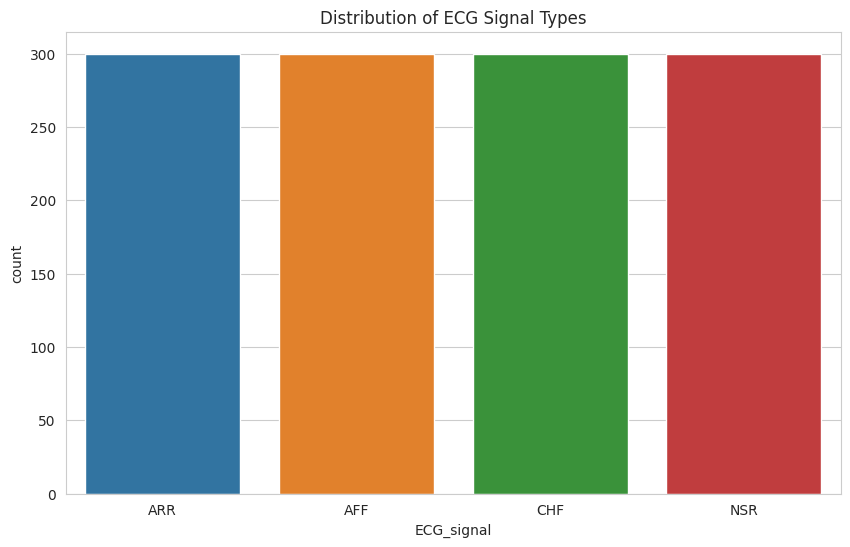

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create a bar plot for the ECG_signal column
plt.figure(figsize=(10, 6))
sns.countplot(x='ECG_signal', data=data)
plt.title('Distribution of ECG Signal Types')
plt.show()





QUESTION 2 - Show the correlation heatmap of ECG Features.

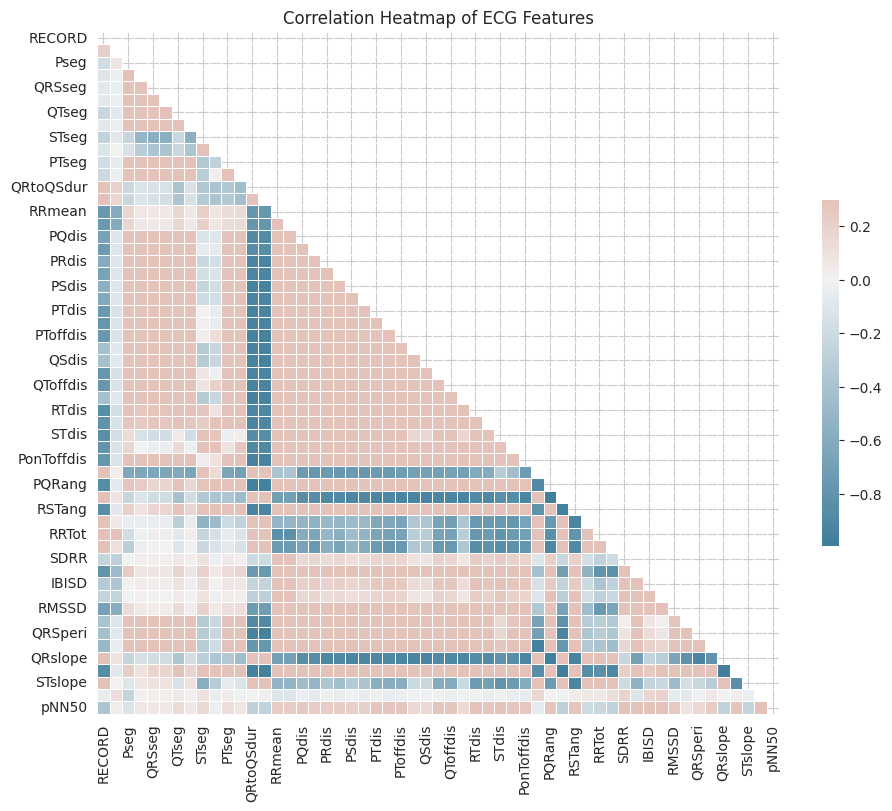

In [ ]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of ECG Features')
plt.show()

QUESTION 3 - How different ECG features differ across the different types of cardiac ailments.

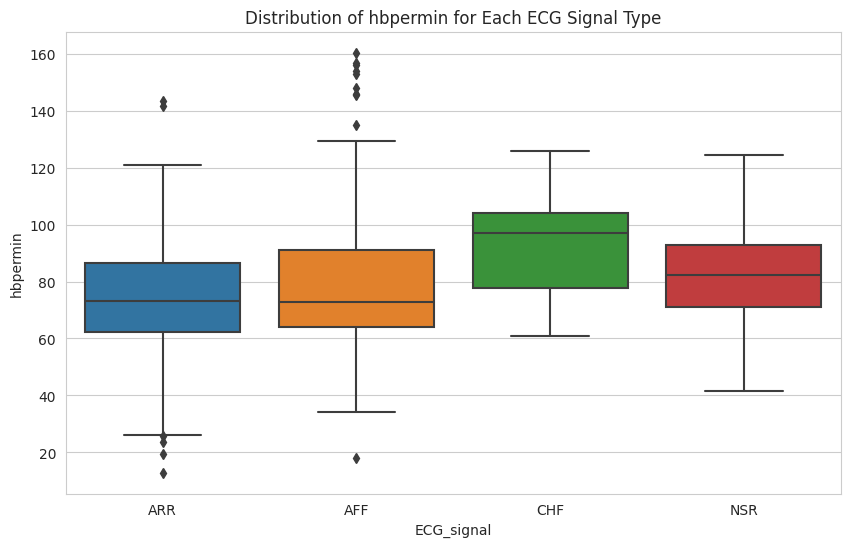

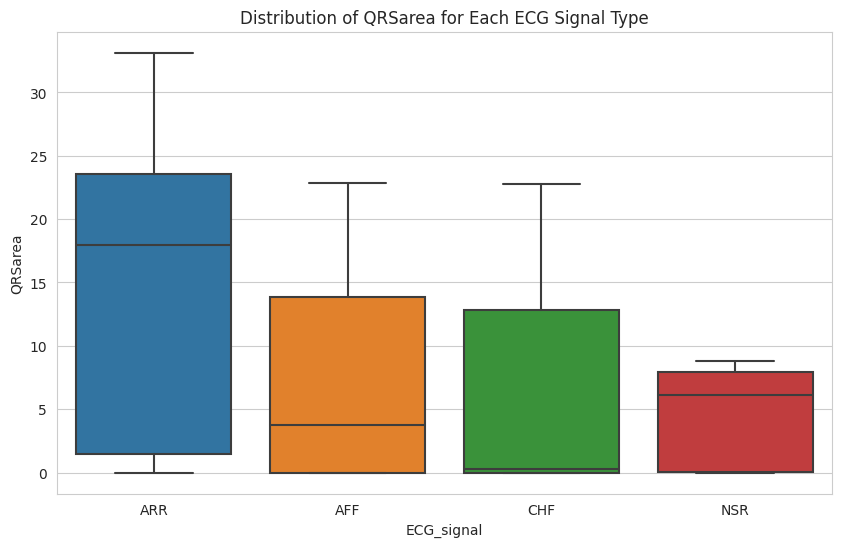

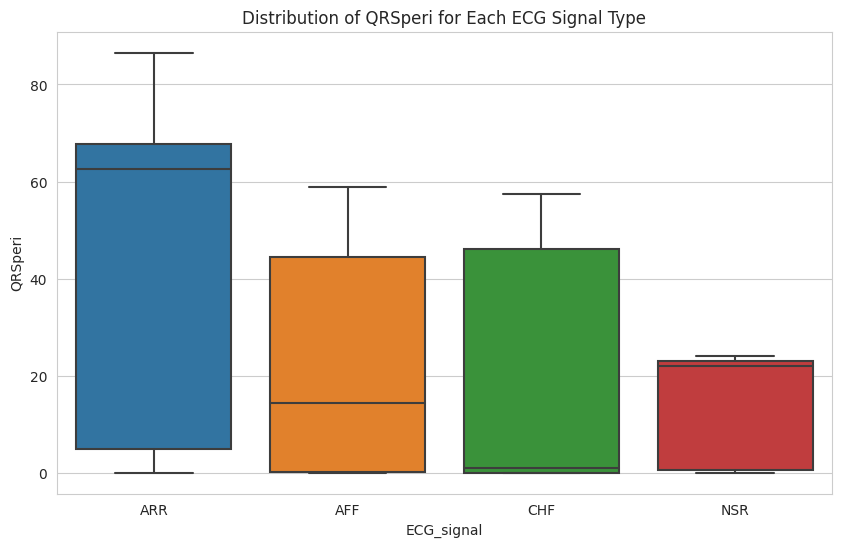

In [ ]:
# Select a few features to visualize
features = ['hbpermin', 'QRSarea', 'QRSperi']

# Plot the distribution of these features for each type of ECG signal
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='ECG_signal', y=feature, data=data_filled)
    plt.title(f'Distribution of {feature} for Each ECG Signal Type')
    plt.show()

QUESTION 4 - Show the distribution of heartbeats per minute for each ailment.

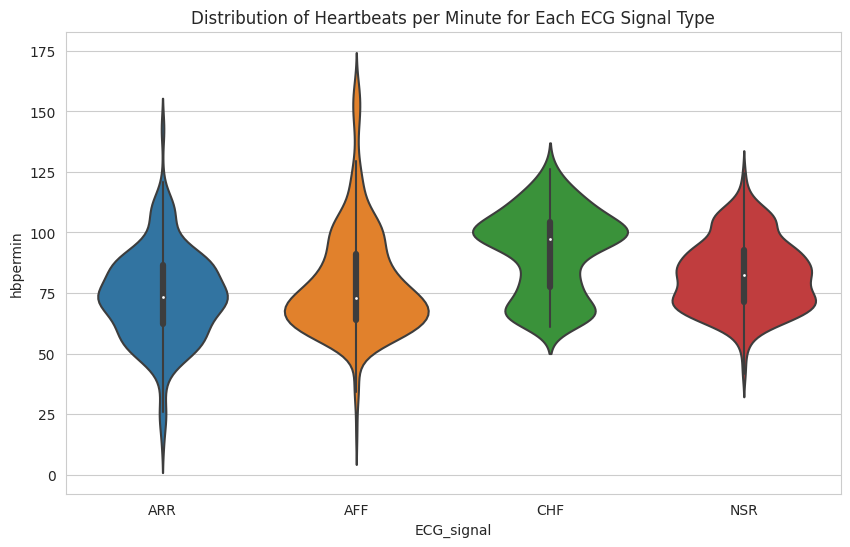

In [ ]:
# Distribution of heartbeats per minute for each ECG signal
plt.figure(figsize=(10, 6))
sns.violinplot(x='ECG_signal', y='hbpermin', data=data_filled)
plt.title('Distribution of Heartbeats per Minute for Each ECG Signal Type')
plt.show()


QUESTION 5 - Show the relationships between several pairs of features

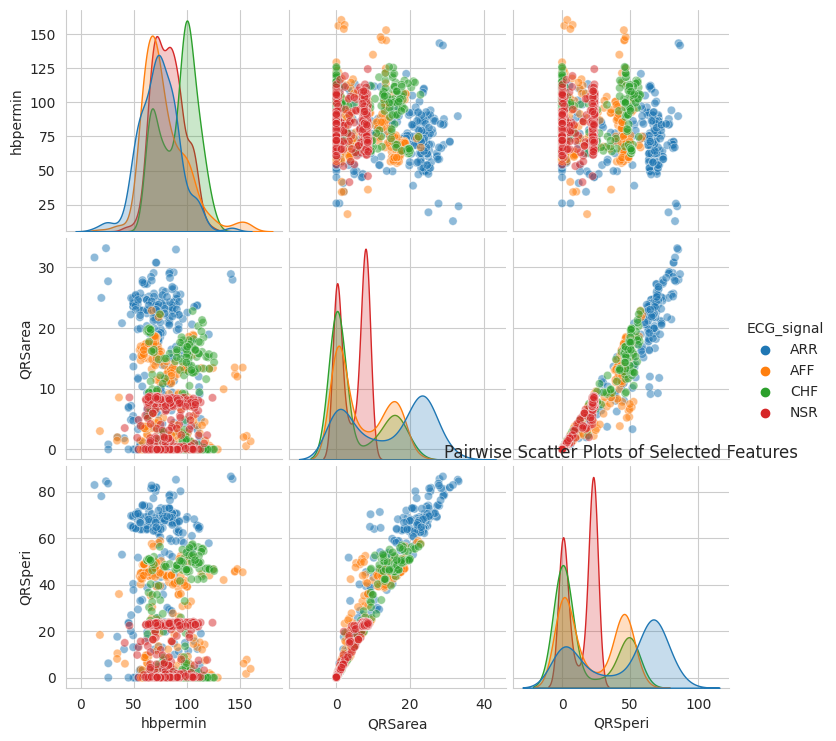

In [ ]:
# Pairwise scatter plots of 'hbpermin', 'QRSarea', and 'QRSperi' for each ECG signal type
sns.pairplot(data_filled, vars=['hbpermin', 'QRSarea', 'QRSperi'], hue='ECG_signal', plot_kws={'alpha': 0.5})
plt.title('Pairwise Scatter Plots of Selected Features')
plt.show()

EVALUATION -

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the categorical target variable
le = LabelEncoder()
data_filled['ECG_signal'] = le.fit_transform(data_filled['ECG_signal'])

# Split the data into features (X) and target (y)
X = data_filled.drop('ECG_signal', axis=1)
y = data_filled['ECG_signal']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 55), (240, 55), (960,), (240,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = rf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

accuracy

1.0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the models
lr = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

# List of models
models = [lr, svm, gbc]
model_names = ['Logistic Regression', 'Support Vector Machine', 'Gradient Boosting Classifier']

# Train and evaluate each model
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.9958333333333333
Support Vector Machine Accuracy: 0.9875
Gradient Boosting Classifier Accuracy: 1.0
